In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
pd.set_option('max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset initial exploration

In [2]:
df = pd.read_csv('datasets\prices_main.csv')

In [3]:
df.head(10)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,False,True,True,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
5,6356784,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
6,6356790,Palm Jumeirah,25.114275,55.139764,8503600,2062,4123.96,2,3,High,True,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,True
7,6356797,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
8,6376886,Palm Jumeirah,25.106668,55.149275,2100000,2186,960.66,3,3,Low,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,6406935,Downtown Dubai,25.194935,55.282665,2690000,1521,1768.57,2,3,Medium,False,False,True,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False


In [4]:
df.shape

(1905, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [6]:
# Checking of repeat apartments
df['id'].nunique()

1905

In [10]:
# Get rid of duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(1905, 38)

## EDA

In [8]:
# Target (Y)
df['price'].describe()

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

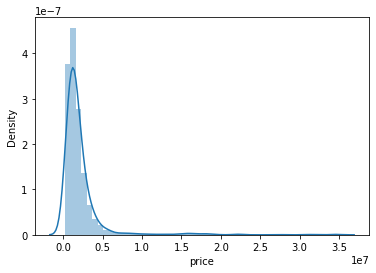

In [14]:
# Distribution
sns.distplot(df['price']);